In [1]:
# Suppress annoying warning messages
import warnings
warnings.filterwarnings(action='ignore', category=Warning)

import numpy as np
import math
import pandas as pd
import mesa_reader as mr
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
from matplotlib.lines import Line2D
import matplotlib.transforms as mtrans
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from astropy import units as u
from astropy import constants as const
from astropy.units import Quantity

%matplotlib inline

## Load tabulated EoS data

In [2]:
#Import tabulated data

ACB5file = np.genfromtxt("data/ACB5/combined_ACB5_data.csv", delimiter=',', skip_header=1)

radius_tab = ACB5file[:,1]               # value given in km
mass_tab = ACB5file[:,2]                 # value given in M_sol
mass_bar_tab = ACB5file[:,4]             # value given in M_sol
angular_momentum_tab = ACB5file[:,5]     # value given in G M_sun^2 / c
spin_frequency_tab = ACB5file[:,6]       # value given in Hz

# ACB5file = np.genfromtxt("data/ACB5/M_R_J_merged_ACB5.dat")


# mass_tab = ACB5file[:,0]                 # value given in M_sol
# radius_tab = ACB5file[:,1]               # value given in km
# angular_momentum_tab = ACB5file[:,2]     # value given in G M_sun^2 / c
# spin_frequency_tab = ACB5file[:,3]       # value given in Hz

## Load model data

In [3]:
model_m1 = pd.read_csv("data/model_m1.csv")
model_m2 = pd.read_csv("data/model_m2.csv")
model_m3 = pd.read_csv("data/model_m3.csv")

model_m1.head(5)

,age [yr],donor_star_mass [Msun],donor_star_radius [Rsun],mass_transfer_rate [Msun/yr],mass_accretion_rate [Msun/yr],neutron_star_mass [Msun],neutron_star_radius [km],neutron_star_angular_momentum [Msun^2 / (c * G)],neutron_star_spin_frequency [Hz],neutron_star_spin_equilibrium_frequency [Hz],neutron_star_torque [kg * m^2 / s^2],neutron_star_magnetic_radius [km],neutron_star_corotation_radius [km],neutron_star_light_cylinder_radius [km],binary_separation [Rsun],orbital_period [days],neutron_star_bar_mass [Msun]
0,100000.0,1.0,0.897205,1.000000e-99,1.000000e-99,1.0,13.301571,0.000000e+00,1.014265,8.903125e-37,-3.546970e+16,1.618660e+27,1483.940419,47042.412104,21.202647,8.000000,1.069235
1,220000.0,1.0,0.897208,1.000000e-99,1.000000e-99,1.0,13.301571,-1.525970e-13,1.014265,8.903125e-37,-3.546970e+16,1.618660e+27,1483.940419,47042.412088,21.202647,7.999999,1.069235
2,364000.0,1.0,0.897198,1.000000e-99,1.000000e-99,1.0,13.301571,-3.357134e-13,1.014265,8.903125e-37,-3.546970e+16,1.618660e+27,1483.940419,47042.412082,21.202646,7.999999,1.069235
3,536800.0,1.0,0.897167,1.000000e-99,1.000000e-99,1.0,13.301571,-5.554530e-13,1.014265,8.903125e-37,-3.546970e+16,1.618660e+27,1483.940420,47042.412147,21.202645,7.999998,1.069235
4,744160.0,1.0,0.897102,1.000000e-99,1.000000e-99,1.0,13.301571,-8.191406e-13,1.014265,8.903125e-37,-3.546970e+16,1.618660e+27,1483.940421,47042.412201,21.202644,7.999998,1.069235


In [4]:
# Rename columns of dataframe

mapper = {
    "age [yr]" : "age",
    "donor_star_mass [Msun]" : "don_mass",
    "donor_star_radius [Rsun]" : "don_radius",
    "mass_transfer_rate [Msun/yr]" : "mdot_transfer",
    "mass_accretion_rate [Msun/yr]" : "mdot",
    "neutron_star_mass [Msun]" : "ns_mass",
    "neutron_star_radius [km]" : "ns_radius",
    "neutron_star_angular_momentum [Msun^2 / (c * G)]" : "ns_ang_mom",
    "neutron_star_spin_frequency [Hz]" : "ns_fspin",
    "neutron_star_spin_equilibrium_frequency [Hz]" : "ns_eq_fspin",
    "neutron_star_torque [kg * m^2 / s^2]" : "ns_torque",
    "neutron_star_magnetic_radius [km]" : "ns_r_mag",
    "neutron_star_corotation_radius [km]" : "ns_r_cor",
    "neutron_star_light_cylinder_radius [km]" : "ns_r_lc",
    "binary_separation [Rsun]" : "binary_separation",
    "orbital_period [days]" : "orbital_period",
    "neutron_star_bar_mass [Msun]" : "ns_mass_bar"
}

In [5]:
model_m1.rename(columns=mapper, inplace=True)
model_m2.rename(columns=mapper, inplace=True)
model_m3.rename(columns=mapper, inplace=True)

In [6]:
model_m2.head(1)

,age,don_mass,don_radius,mdot_transfer,mdot,ns_mass,ns_radius,ns_ang_mom,ns_fspin,ns_eq_fspin,ns_torque,ns_r_mag,ns_r_cor,ns_r_lc,binary_separation,orbital_period,ns_mass_bar
0,100000.0,1.0,0.897205,1.000000e-99,1.000000e-99,1.2,13.516911,0.0,0.325474,9.731192e-37,-1.290623e+15,1.621065e+27,3364.343237,146596.87361,21.887071,8.0,1.302284


## Style of plots

In [7]:
plt.style.use(["default", "notebook"])

## Transition line

In [8]:
def ns_radius_trans(ns_mass):
    """
    Args:
    -----
    ns_mass  : Gravitational mass of neutron star; unit [Msun]

    Return:
    -------
    Neutron star radius; unit [km]
    """
    ns_mass = u.Quantity(ns_mass, u.Msun).decompose()
    return (
        1.372631822399999990e01
        + ((ns_mass / u.Msun) - 1.402221574999999998e00) * 9.047860488123854
    ) * u.km


def get_trans_idx(ns_masses, ns_radii, eps=0.01):
    """
    Find the index that is within epsilon of the transition line in the M-R plane.

    Args:
    -----
    ns_masses : Array of neutron star masses in solar masses (Msun).
    ns_radii  : Array of neutron star radii in kilometers (km).
    eps       : Tolerance level in kilometers (km) for considering a neutron star to be on the transition line.

    Returns:
    --------
    Index of the neutron star that is within epsilon of the transition line. 
    Returns None if no such star is found.
    """
    # Convert ns_masses to Quantity for compatibility with ns_radius_trans
    ns_masses = u.Quantity(ns_masses, u.Msun)
    ns_radii = u.Quantity(ns_radii, u.km)

    # Calculate the transition radii for all neutron stars
    # trans_radii = np.array([ns_radius_trans(mass).value for mass in ns_masses])
    trans_radii = ns_radius_trans(ns_masses)

    # Calculate the absolute differences between actual radii and transition radii
    differences = np.abs(ns_radii.value - trans_radii.value)

    # Find indices where the absolute difference is smaller than epsilon
    close_indices = np.where(differences < eps)[0]

    if len(close_indices) > 0:
        return close_indices[0]  # Return the first index where the condition is met
    else:
        return None

## Case M1: No phase transition

In [9]:
h1=mr.MesaData("data/md1.0_mc1.0_p8.0_z0.02_b0.5/binary_history.data")
h1s=mr.MesaData("data/md1.0_mc1.0_p8.0_z0.02_b0.5/history.data")

In [10]:
h1.header_data

{'version_number': '12778',
 'initial_don_mass': 1.0,
 'initial_acc_mass': 1.0,
 'initial_period_days': 8.0,
 'compiler': 'gfortran',
 'build': '9.2.0',
 'MESA_SDK_version': '',
 'date': '20201204'}

In [11]:
print(h1s.bulk_names)
print('-'*50)
print(h1.bulk_names)

('model_number', 'num_zones', 'star_age', 'time_step', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'max_conv_vel_div_csound', 'max_gradT_div_grada', 'max_gradT_sub_grada', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'mix_type_1', 'mix_qtop_1', 'mix_type_2', 'mix_qtop_2', 'mix_type_3', 'mix_qtop_3', 'mix_type_4', 'mix_qtop_4', 'mix_type_5', 'mix_qtop_5', 'mix_type_6', 'mix_qtop_6', 'mix_type_7', 'mix_qtop_7', 'mix_type_8', 'mix_qtop_8', 'mix_type_9', 'mix_qtop_9', 'mix_type_10', 'mix_qtop_10', 'mix_type_11', 'mix_qtop_11', 'mix_type_12', 'mix_qtop_12', 'mix_type_13', 'mix_qtop_13', 'mix_type_14', 'mix_qtop_14', 'mix_type_15', 'mix_qtop_15', 'mix_type_16', 'mix_qtop_16', 'mix_type_17', 'mix_qtop_17', 'mix_type_18', 'mix_qtop_18', 'mix_type_19', 'mix_qtop_19', 'mix_type_20', 'mix_qtop_20', 'mix_type_21', 'mix_qtop_21', 'mix_type_22', 'mix_qtop_22', 'mix_type_23', 'mix_qtop_23', 'mix_type_24', 'mix_qtop_24', '

In [12]:
lg_m1dot = h1.data("lg_mtransfer_rate")
lg_m1dot[lg_m1dot > 0] = lg_m1dot[0] #exclude some weird values

# Masks to filter the RLOF phases
first_rlof_case1_mask = np.where((lg_m1dot > -9) & (h1.data('age')/1e9 < 12.29))
second_rlof_case1_mask = np.where((lg_m1dot > -9) & (h1.data('age')/1e9 > 12.29))

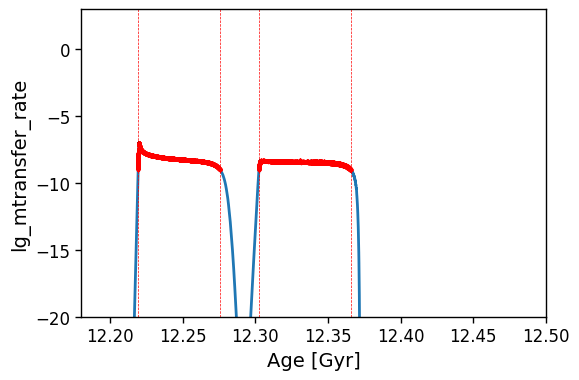

In [13]:
plt.xlabel("Age [Gyr]")
plt.ylabel("lg_mtransfer_rate")

plt.plot(h1.data('age')/1e9, lg_m1dot)

plt.scatter(h1.data('age')[first_rlof_case1_mask]/1e9, lg_m1dot[first_rlof_case1_mask], s=2, c='r', zorder=20)
plt.scatter(h1.data('age')[second_rlof_case1_mask]/1e9, lg_m1dot[second_rlof_case1_mask], s=2, c='r', zorder=20)



plt.axvline(h1.data('age')[first_rlof_case1_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[first_rlof_case1_mask][-1]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[second_rlof_case1_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[second_rlof_case1_mask][-1]/1e9, ls='--', lw=0.5, c='r')

plt.xlim([12.18, 12.5])
plt.ylim([-20, 3])

plt.show()

In [14]:
print(
    "Age of donor star when RLOF is initiated: {:.2f} Gyr"
    .format(h1.data('age')[first_rlof_case1_mask[0][0]]/1e9)
)

Age of donor star when RLOF is initiated: 12.22 Gyr


In [15]:
print(
    "Age of donor star when it reaches its maximum mass transfer rate: {:.2f} Gyr"
    .format(h1.data('age')[np.where(lg_m1dot == max(lg_m1dot))][0]/1e9)
)

Age of donor star when it reaches its maximum mass transfer rate: 12.22 Gyr


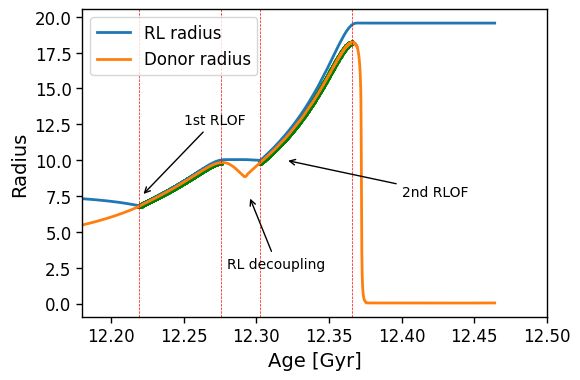

In [16]:
plt.xlabel("Age [Gyr]")
plt.ylabel("Radius")

plt.plot(h1.data("age") / 1e9, h1.data("rl_1"), label="RL radius")
plt.plot(h1.data("age") / 1e9, h1.data("star_1_radius"), label="Donor radius")
plt.scatter(
    h1.data("age")[first_rlof_case1_mask] / 1e9,
    h1.data("star_1_radius")[first_rlof_case1_mask],
    c="g",
    s=5,
)
plt.scatter(
    h1.data("age")[second_rlof_case1_mask] / 1e9,
    h1.data("star_1_radius")[second_rlof_case1_mask],
    c="g",
    s=5,
)


plt.axvline(h1.data("age")[first_rlof_case1_mask][0] / 1e9, ls="--", lw=0.5, c="r")
plt.axvline(h1.data("age")[first_rlof_case1_mask][-1] / 1e9, ls="--", lw=0.5, c="r")
plt.axvline(h1.data("age")[second_rlof_case1_mask][0] / 1e9, ls="--", lw=0.5, c="r")
plt.axvline(h1.data("age")[second_rlof_case1_mask][-1] / 1e9, ls="--", lw=0.5, c="r")


plt.annotate(
    "1st RLOF", xy=(12.221, 7.5), xytext=(12.25, 12.5), arrowprops=dict(arrowstyle="->")
)
plt.annotate(
    "RL decoupling",
    xy=(12.295, 7.5),
    xytext=(12.28, 2.5),
    arrowprops=dict(arrowstyle="->"),
)
plt.annotate(
    "2nd RLOF", xy=(12.32, 10.0), xytext=(12.4, 7.5), arrowprops=dict(arrowstyle="->")
)

plt.xlim([12.18, 12.5])

plt.legend(loc="upper left")
plt.show()

In [17]:
# Indeces for the various mass transfer episodes

rlof_1_start_idx = first_rlof_case1_mask[0][0]
rlof_1_end_idx = first_rlof_case1_mask[0][-1]
rldp_end_idx = second_rlof_case1_mask[0][0]
rlof_2_end_idx = second_rlof_case1_mask[0][-1]

In [18]:
percentage_occupied = h1.data("star_1_radius")[rlof_1_end_idx] / h1.data("rl_1")[rlof_1_end_idx] * 100
print(f"The radius of the star occupies approximately {percentage_occupied:.1f}% of the Roche lobe when it decouples.")

The radius of the star occupies approximately 98.3% of the Roche lobe when it decouples.


In [19]:
print(
    "Duration of 1st RLOF: {:.2f} Myr"
    .format(
        (h1.data('age')[rlof_1_end_idx] - h1.data('age')[rlof_1_start_idx])/1e6
    )
)

print(
    "Duration of RLDP: {:.2f} Myr"
    .format(
        (h1.data('age')[rldp_end_idx] - h1.data('age')[rlof_1_end_idx])/1e6
    )
)

print(
    "Duration of 2nd RLOF: {:.2f} Myr"
    .format(
        (h1.data('age')[rlof_2_end_idx] - h1.data('age')[rldp_end_idx])/1e6
    )
)

Duration of 1st RLOF: 56.38 Myr
Duration of RLDP: 26.82 Myr
Duration of 2nd RLOF: 63.41 Myr


After ~12.2 Gyrs the donor star expands filling its Roche Lobe for the first time and initiates mass transfer to the neutron star. This phase lasts approximately 56.4 Myr. After that the star decouples from its Roche Lobe and the mass transfer ceases. This plase lasts ~ 27 Myr. Then the star re-fills its RL and enters a new mass trasnfer phase that lasts another ~ 63.5 Myr.

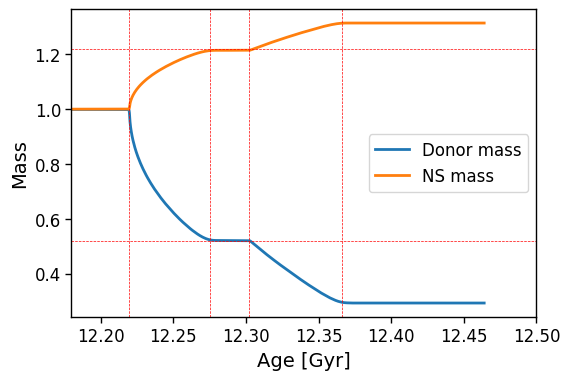

In [20]:
plt.xlabel("Age [Gyr]")
plt.ylabel("Mass")

plt.plot(h1.data('age')/1e9, h1.data('star_1_mass'), label="Donor mass")
plt.plot(h1.data('age')/1e9, h1.data('star_2_mass'), label="NS mass")

plt.axvline(h1.data('age')[first_rlof_case1_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[first_rlof_case1_mask][-1]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[second_rlof_case1_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[second_rlof_case1_mask][-1]/1e9, ls='--', lw=0.5, c='r')


plt.axhline(1.22, ls='--', lw=0.5, c='r')
plt.axhline(0.52, ls='--', lw=0.5, c='r')
plt.xlim([12.18, 12.5])

plt.legend()
plt.show()

In [21]:
print("Mass of donor star at the end: {:.2f} Msun".format(min(h1.data("star_1_mass"))))

print("Mass of neutron star at the end: {:.2f} Msun".format(max(h1.data("star_2_mass"))))

Mass of donor star at the end: 0.29 Msun
Mass of neutron star at the end: 1.31 Msun


Following the 1st mass transfer episode, the donor star has lost almost 50% of its total mass, while the neutron star gained $\sim 0.22 M_\odot$. At the end of the simulation, the donor star has a mass of $\sim 0.29 M_\odot$ and the neutron star a mass of $\sim 1.31 M_\odot$.

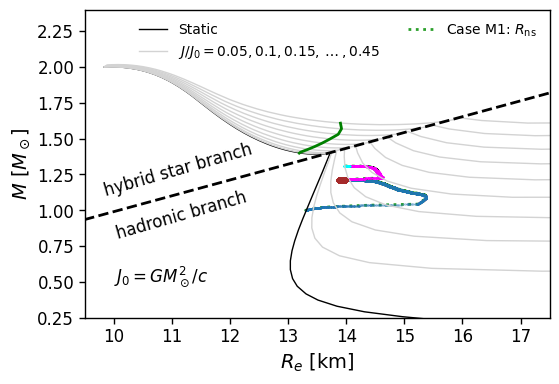

In [22]:
Js = ['0.0','0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45']

for J in Js:
    radius = radius_tab[angular_momentum_tab==np.float64(J)]
    mass = mass_tab[angular_momentum_tab==np.float64(J)]
    if J == "0.0":
        plt.plot(radius, mass,ls='-', color="k", lw=1, label="Static")

    else:
        if J == "0.45" :
            label = r"$J/J_0 = 0.05, 0.1, 0.15, \dots, 0.45$"
        else:
            label = None
        plt.plot(radius, mass, ls='-', color="lightgrey", lw=1, label=label)
        

# Corresponding baryonic mass
R_bar = [13.193, 13.213, 13.265, 13.346, 13.466, 13.586, 13.720, 13.863, 13.920, 13.901]
M_bar = [1.3992, 1.4054, 1.4136, 1.4259, 1.4463, 1.4689, 1.4975, 1.5303, 1.5693, 1.6082]
plt.plot(R_bar, M_bar, c='g')
        
plt.plot(model_m1["ns_radius"],
         model_m1["ns_mass"], 
         ls=':', 
         color='tab:green',
         label='Case M1: $R_\mathrm{ns}$', 
         zorder=0
)  


# 1st RLOF
plt.scatter(
    model_m1["ns_radius"][rlof_1_start_idx:rlof_1_end_idx],
    model_m1["ns_mass"][rlof_1_start_idx:rlof_1_end_idx],
    s=0.01
)
# RLDP
plt.scatter(
    model_m1["ns_radius"][rlof_1_end_idx:rldp_end_idx],
    model_m1["ns_mass"][rlof_1_end_idx:rldp_end_idx],
    s=10, c='brown', 
    zorder=10
)
# 2nd RLOF
plt.scatter(
    model_m1["ns_radius"][rldp_end_idx:rlof_2_end_idx],
    model_m1["ns_mass"][rldp_end_idx:rlof_2_end_idx],
    s=0.01, 
    c='magenta'
)
# Propeller phase
plt.scatter(
    model_m1["ns_radius"][rlof_2_end_idx:], 
    model_m1["ns_mass"][rlof_2_end_idx:], 
    s=0.01, 
    c='cyan'
)

plt.xlabel(r"$R_e$ [km]")
plt.ylabel(r"$M$ [$M_\odot$]")
plt.ylim([0.25, 2.4])
plt.xlim([9.5, 17.5])

s = 12
plt.text(10, 0.5, r"$J_0 = G M_\odot^2 / c$", size=s)


# y = lambda x : 0.111*x - 0.134
# plt.plot(np.linspace(5, 20, 1000), y(np.linspace(5, 20, 1000)), ls='--', c='k')

# Transition line
plt.plot(ns_radius_trans(np.linspace(0, 2, 100)), np.linspace(0, 2, 100), ls='--', c='k')

plt.text(10, 0.8, "hadronic branch", rotation=16, size=s)
plt.text(9.8, 1.1, "hybrid star branch", rotation=16, size=s)

plt.legend(loc="upper right", ncol=2, frameon=False, prop={"size":10})


plt.show()

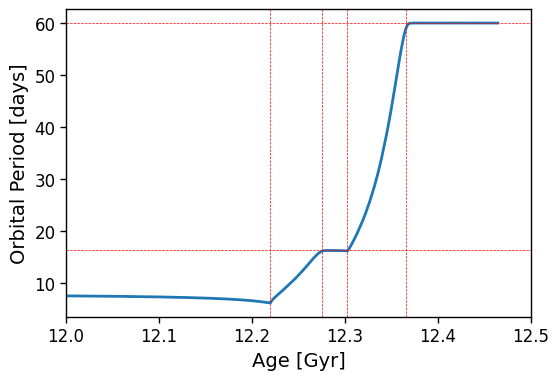

In [23]:
plt.plot(h1.data("age")/1e9, h1.data("period_days"))

plt.axvline(h1.data('age')[first_rlof_case1_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[first_rlof_case1_mask][-1]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[second_rlof_case1_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[second_rlof_case1_mask][-1]/1e9, ls='--', lw=0.5, c='r')


plt.axhline(16.5, ls='--', lw=0.5, c='r')
plt.axhline(60, ls='--', lw=0.5, c='r')
plt.xlim([12, 12.5])

plt.xlabel("Age [Gyr]")
plt.ylabel("Orbital Period [days]")

plt.show()

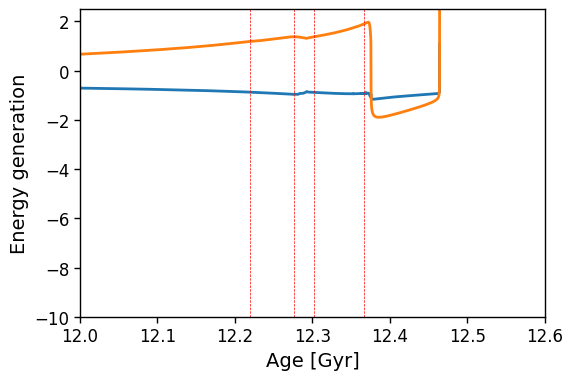

In [24]:
plt.ylim([-10, 2.5])

plt.plot(h1s.data("age")/1e9, h1s.data("pp"))
plt.plot(h1s.data("age")/1e9, h1s.data("cno"))

plt.axvline(h1.data('age')[first_rlof_case1_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[first_rlof_case1_mask][-1]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[second_rlof_case1_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h1.data('age')[second_rlof_case1_mask][-1]/1e9, ls='--', lw=0.5, c='r')

plt.xlabel("Age [Gyr]")
plt.ylabel("Energy generation")

plt.xlim([12, 12.6])
plt.show()

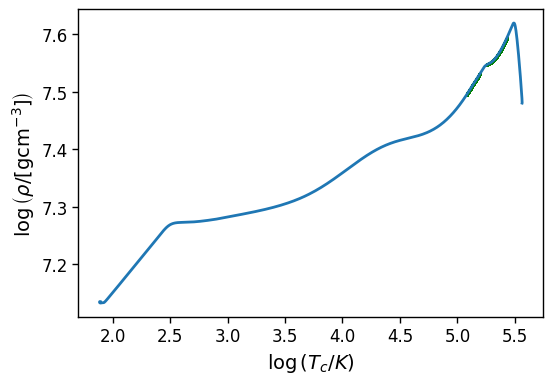

In [25]:
plt.plot(h1s.data("log_cntr_Rho"), h1s.data("log_cntr_T"))
plt.scatter(
    h1s.data("log_cntr_Rho")[first_rlof_case1_mask],
    h1s.data("log_cntr_T")[first_rlof_case1_mask],
    c="g",
    s=1,
)
plt.scatter(
    h1s.data("log_cntr_Rho")[second_rlof_case1_mask],
    h1s.data("log_cntr_T")[second_rlof_case1_mask],
    c="g",
    s=1,
)

plt.xlabel(r"$\log\left(T_c/K\right)$")
plt.ylabel(r"$\log\left(\rho/[\mathrm{g cm^{-3}}]\right)$")

plt.show()

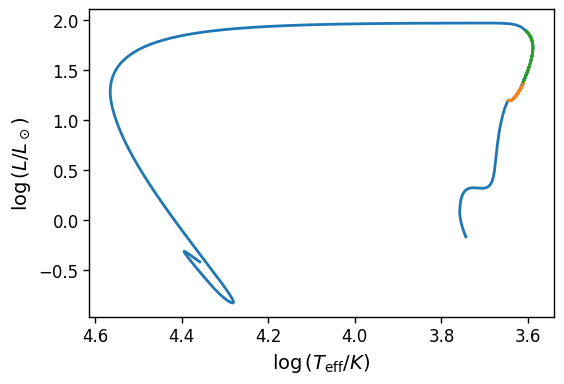

In [26]:
plt.plot(h1s.data("log_Teff"), h1s.data("log_L"))
plt.plot(h1s.data("log_Teff")[first_rlof_case1_mask], h1s.data("log_L")[first_rlof_case1_mask])
plt.plot(h1s.data("log_Teff")[second_rlof_case1_mask], h1s.data("log_L")[second_rlof_case1_mask])


plt.gca().invert_xaxis()

plt.xlabel(r"$\log\left(T_\mathrm{eff}/K\right)$")
plt.ylabel(r"$\log\left(L/L_\odot\right)$")

plt.show()

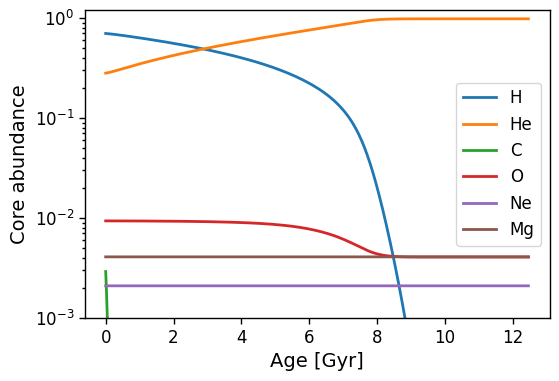

In [27]:
plt.plot(h1s.data("age")/1e9, h1s.data("center_h1"), label='H')
plt.plot(h1s.data("age")/1e9, h1s.data("center_he4"), label='He')
plt.plot(h1s.data("age")/1e9, h1s.data("center_c12"), label='C')
plt.plot(h1s.data("age")/1e9, h1s.data("center_o16"), label='O')
plt.plot(h1s.data("age")/1e9, h1s.data("center_ne20"), label='Ne')
plt.plot(h1s.data("age")/1e9, h1s.data("center_mg24"), label='Mg')

plt.yscale("log")
plt.ylim([1e-3,1.2])

plt.legend()

plt.xlabel("Age [Gyr]")
plt.ylabel("Core abundance")

plt.show()

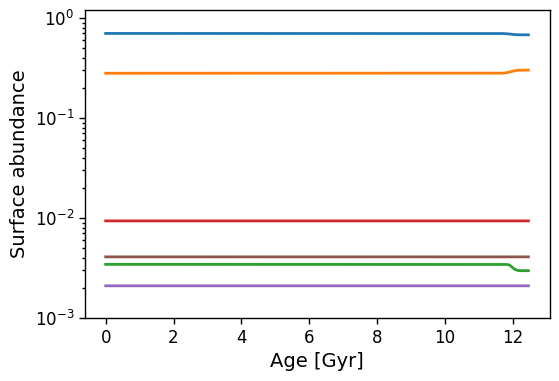

In [28]:
plt.plot(h1s.data("age")/1e9, h1s.data("surface_h1"))
plt.plot(h1s.data("age")/1e9, h1s.data("surface_he4"))
plt.plot(h1s.data("age")/1e9, h1s.data("surface_c12"))
plt.plot(h1s.data("age")/1e9, h1s.data("surface_o16"))
plt.plot(h1s.data("age")/1e9, h1s.data("surface_ne20"))
plt.plot(h1s.data("age")/1e9, h1s.data("surface_mg24"))

plt.yscale("log")
plt.ylim([1e-3,1.2])

plt.xlabel("Age [Gyr]")
plt.ylabel("Surface abundance")

plt.show()

In [29]:
print("Final total mass: {:.3f} Msun".format(h1s.data("star_mass")[-1]))
print("Final envelope mass: {:.3f} Msun".format(h1s.data("envelope_mass")[-1]))

Final total mass: 0.292 Msun
Final envelope mass: 0.002 Msun


## Case M2: Phase transition during accretion

In [30]:
h2 = mr.MesaData("data/md1.0_mc1.2_p8.0_z0.02_b0.5/binary_history.data")
h2s = mr.MesaData("data/md1.0_mc1.2_p8.0_z0.02_b0.5/history.data")

In [31]:
lg_m2dot = h2.data("lg_mtransfer_rate")
lg_m2dot[lg_m2dot > 0] = lg_m2dot[0] #exclude some weird values

# Masks to filter the RLOF phases
first_rlof_case2_mask = np.where((lg_m2dot > -9) & (h2.data('age')/1e9 < 12.29))
second_rlof_case2_mask = np.where((lg_m2dot > -9) & (h2.data('age')/1e9 > 12.29))

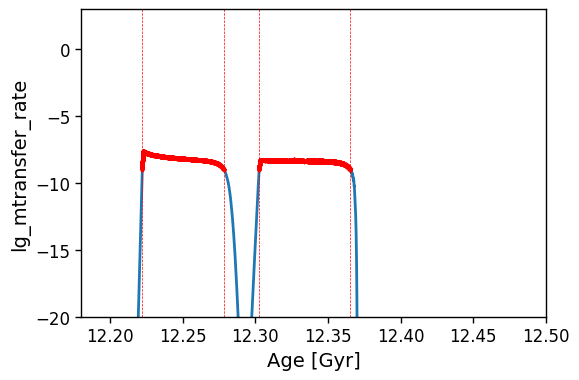

In [32]:
plt.xlabel("Age [Gyr]")
plt.ylabel("lg_mtransfer_rate")

plt.plot(h2.data('age')/1e9, lg_m2dot)
plt.scatter(h2.data('age')[first_rlof_case2_mask]/1e9, lg_m2dot[first_rlof_case2_mask], s=2, c='r', zorder=20)
plt.scatter(h2.data('age')[second_rlof_case2_mask]/1e9, lg_m2dot[second_rlof_case2_mask], s=2, c='r', zorder=20)


plt.axvline(h2.data('age')[first_rlof_case2_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[first_rlof_case2_mask][-1]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[second_rlof_case2_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[second_rlof_case2_mask][-1]/1e9, ls='--', lw=0.5, c='r')

# plt.axhline(np.log10(1.385*10**(-8))) # Edd limit

plt.xlim([12.18, 12.5])
plt.ylim([-20, 3])

plt.show()

In [33]:
print(
    "Age of donor star when RLOF is initiated: {:.2f} Gyr"
    .format(h2.data('age')[first_rlof_case2_mask[0][0]]/1e9)
)

Age of donor star when RLOF is initiated: 12.22 Gyr


In [34]:
print(
    "Age of donor star when it reaches its maximum mass transfer rate: {:.2f} Gyr"
    .format(h2.data('age')[np.where(lg_m2dot == max(lg_m2dot))][0]/1e9)
)

Age of donor star when it reaches its maximum mass transfer rate: 12.22 Gyr


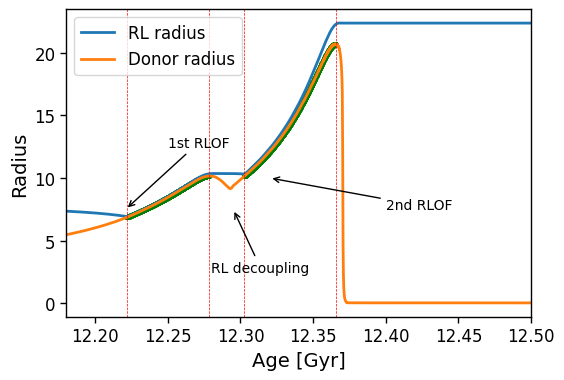

In [35]:
plt.xlabel("Age [Gyr]")
plt.ylabel("Radius")

plt.plot(h2.data("age") / 1e9, h2.data("rl_1"), label="RL radius")
plt.plot(h2.data("age") / 1e9, h2.data("star_1_radius"), label="Donor radius")
plt.scatter(
    h2.data("age")[first_rlof_case2_mask] / 1e9,
    h2.data("star_1_radius")[first_rlof_case2_mask],
    c="g",
    s=5,
)
plt.scatter(
    h2.data("age")[second_rlof_case2_mask] / 1e9,
    h2.data("star_1_radius")[second_rlof_case2_mask],
    c="g",
    s=5,
)

plt.axvline(h2.data("age")[first_rlof_case2_mask][0] / 1e9, ls="--", lw=0.5, c="r")
plt.axvline(h2.data("age")[first_rlof_case2_mask][-1] / 1e9, ls="--", lw=0.5, c="r")
plt.axvline(h2.data("age")[second_rlof_case2_mask][0] / 1e9, ls="--", lw=0.5, c="r")
plt.axvline(h2.data("age")[second_rlof_case2_mask][-1] / 1e9, ls="--", lw=0.5, c="r")


plt.annotate(
    "1st RLOF", xy=(12.221, 7.5), xytext=(12.25, 12.5), arrowprops=dict(arrowstyle="->")
)
plt.annotate(
    "RL decoupling",
    xy=(12.295, 7.5),
    xytext=(12.28, 2.5),
    arrowprops=dict(arrowstyle="->"),
)
plt.annotate(
    "2nd RLOF", xy=(12.32, 10.0), xytext=(12.4, 7.5), arrowprops=dict(arrowstyle="->")
)

plt.xlim([12.18, 12.5])

plt.legend(loc="upper left")
plt.show()

In [36]:
# Indeces for the various mass transfer episodes

rlof_1_start_idx = first_rlof_case2_mask[0][0]
rlof_1_end_idx = first_rlof_case2_mask[0][-1]
rldp_end_idx = second_rlof_case2_mask[0][0]
rlof_2_end_idx = second_rlof_case2_mask[0][-1]

In [37]:
percentage_occupied = (
    h2.data("star_1_radius")[rlof_1_end_idx] / h2.data("rl_1")[rlof_1_end_idx] * 100
)
print(
    f"The radius of the star occupies approximately {percentage_occupied:.1f}% of the Roche lobe when it decouples."
)

The radius of the star occupies approximately 98.3% of the Roche lobe when it decouples.


In [38]:
print(
    "Duration of 1st RLOF: {:.2f} Myr"
    .format(
        (h2.data('age')[rlof_1_end_idx] - h2.data('age')[rlof_1_start_idx])/1e6
    )
)


print(
    "Duration of RLDP: {:.2f} Myr"
    .format(
        (h2.data('age')[rldp_end_idx] - h2.data('age')[rlof_1_end_idx])/1e6
    )
)


print(
    "Duration of 2nd RLOF: {:.2f} Myr"
    .format(
        (h2.data('age')[rlof_2_end_idx] - h2.data('age')[rldp_end_idx])/1e6
    )
)

Duration of 1st RLOF: 56.18 Myr
Duration of RLDP: 24.28 Myr
Duration of 2nd RLOF: 62.86 Myr


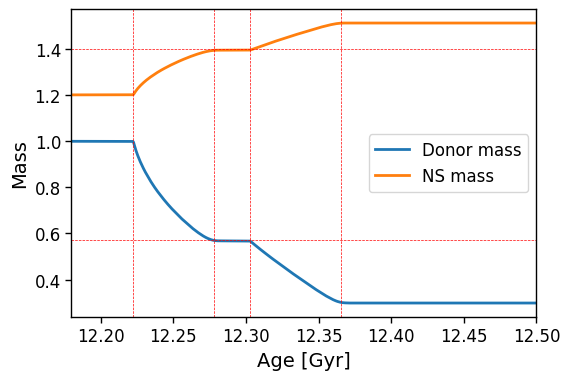

In [39]:
plt.xlabel("Age [Gyr]")
plt.ylabel("Mass")

plt.plot(h2.data('age')/1e9, h2.data('star_1_mass'), label="Donor mass")
plt.plot(h2.data('age')/1e9, h2.data('star_2_mass'), label="NS mass")

plt.axvline(h2.data('age')[first_rlof_case2_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[first_rlof_case2_mask][-1]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[second_rlof_case2_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[second_rlof_case2_mask][-1]/1e9, ls='--', lw=0.5, c='r')


plt.axhline(1.4, ls='--', lw=0.5, c='r')
plt.axhline(0.57, ls='--', lw=0.5, c='r')
plt.xlim([12.18, 12.5])

plt.legend()
plt.show()

In [40]:
print("Mass of donor star at the end: {:.2f} Msun".format(min(h2.data("star_1_mass"))))

print("Mass of neutron star at the end: {:.2f} Msun".format(max(h2.data("star_2_mass"))))

Mass of donor star at the end: 0.30 Msun
Mass of neutron star at the end: 1.51 Msun


In [41]:
# Find phase transition index
transition_idx_case2 = get_trans_idx(model_m2["ns_mass"], model_m2["ns_radius"], eps=1e-4)
print(transition_idx_case2)
print(
    "M@PT = {:.2f} Msun; R@PT = {:.2f} km".format(
        model_m2["ns_mass"][transition_idx_case2],
        model_m2["ns_radius"][transition_idx_case2],
    )
)

# transition_idx_case2 = 0

# for m, r in zip(model_m2["ns_mass"], model_m2["ns_radius"]):
#     if math.isclose(m, 1.492, abs_tol=0.004) and math.isclose(r, 14.61, abs_tol=0.003):
#         print(transition_idx_case2)
#         print(m, r)
#         break
#     else:
#         transition_idx_case2 += 1

36187
M@PT = 1.50 Msun; R@PT = 14.59 km


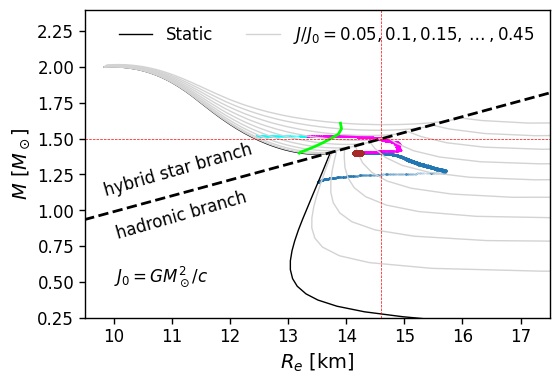

In [42]:
Js = ['0.0','0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45']
s=12

for J in Js:
    radius = radius_tab[angular_momentum_tab==np.float64(J)]
    mass = mass_tab[angular_momentum_tab==np.float64(J)]

    if J == "0.0":
        plt.plot(radius, mass,ls='-', color="k", lw=1, label="Static")
    else:
        if J == "0.45" :
            label = r"$J/J_0 = 0.05, 0.1, 0.15, \dots, 0.45$"
        else:
            label = None
        plt.plot(radius, mass, ls='-', color="lightgrey", lw=1, label=label)
               

# Corresponding baryonic mass
R_bar = [13.193, 13.213, 13.265, 13.346, 13.466, 13.586, 13.720, 13.863, 13.920, 13.901]
M_bar = [1.3992, 1.4054, 1.4136, 1.4259, 1.4463, 1.4689, 1.4975, 1.5303, 1.5693, 1.6082]
plt.plot(R_bar, M_bar, c='lime')

            

# 1st RLOF
plt.scatter(
    model_m2["ns_radius"][rlof_1_start_idx:rlof_1_end_idx],
    model_m2["ns_mass"][rlof_1_start_idx:rlof_1_end_idx],
    s=0.01
)

# RLDP
plt.scatter(
    model_m2["ns_radius"][rlof_1_end_idx:rldp_end_idx],
    model_m2["ns_mass"][rlof_1_end_idx:rldp_end_idx],
    s=10,
    c='brown',
    zorder=10
)

# 2nd RLOF
plt.scatter(
    model_m2["ns_radius"][rldp_end_idx:rlof_2_end_idx], 
    model_m2["ns_mass"][rldp_end_idx:rlof_2_end_idx], 
    s=0.01, 
    c='magenta'
)

# Propeller phase
plt.scatter(
    model_m2["ns_radius"][rlof_2_end_idx:], 
    model_m2["ns_mass"][rlof_2_end_idx:], 
    s=0.01, 
    c='cyan'
)

plt.xlabel(r"$R_e$ [km]")
plt.ylabel(r"$M$ [$M_\odot$]")
plt.ylim([0.25, 2.4])
plt.xlim([9.5, 17.5])


s = 12
plt.text(10, 0.5, r"$J_0 = G M_\odot^2 / c$", size=s)


# y = lambda x : 0.111*x - 0.134
# plt.plot(np.linspace(5, 20, 1000), y(np.linspace(5, 20, 1000)), ls='--', c='k')

# Transition line
plt.plot(ns_radius_trans(np.linspace(0, 2, 100)), np.linspace(0, 2, 100), ls='--', c='k')

plt.text(10, 0.8, "hadronic branch", rotation=16, size=s)
plt.text(9.8, 1.1, "hybrid star branch", rotation=16, size=s)

plt.legend(loc="upper right", ncol=2, frameon=False, prop={"size":s})

# Transition
# plt.axvline(14.61, ls='--', lw=0.5, c='r')
# plt.axhline(1.492, ls='--', lw=0.5, c='r')
plt.axvline(model_m2["ns_radius"][transition_idx_case2], ls='--', lw=0.5, c='r')
plt.axhline(model_m2["ns_mass"][transition_idx_case2], ls='--', lw=0.5, c='r')

plt.show()

In [43]:
print(
    "Age at transition: {:.2f} Gyr"
    .format(
        model_m2["age"][transition_idx_case2]/1e9
    )
)

Age at transition: 12.35 Gyr


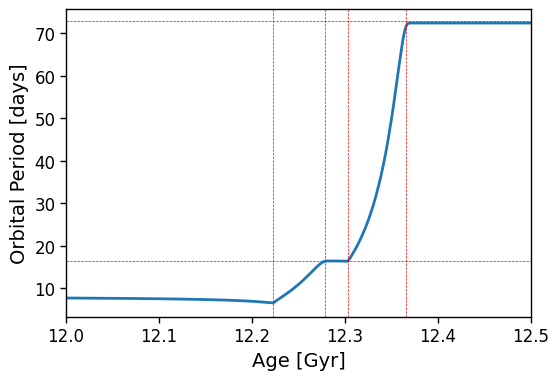

In [44]:
plt.plot(h2.data("age")/1e9, h2.data("period_days"))

plt.axvline(h2.data('age')[first_rlof_case2_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[first_rlof_case2_mask][-1]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[second_rlof_case2_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[second_rlof_case2_mask][-1]/1e9, ls='--', lw=0.5, c='r')


plt.axhline(16.5, ls='--', lw=0.5, c='r')
plt.axhline(73, ls='--', lw=0.5, c='r')
plt.xlim([12, 12.5])

plt.xlabel("Age [Gyr]")
plt.ylabel("Orbital Period [days]")

plt.show()

In [45]:
print(
    "Following phase transition, the mass transfer continues for another {:.2f} Myr.".format(
        (h2.data("age")[rlof_2_end_idx] - h2.data("age")[transition_idx_case2]) / 1e6
    )
)
print("By the time the mass tranfer stops, the orbit should have been recircularized!")

Following phase transition, the mass transfer continues for another 18.73 Myr.
By the time the mass tranfer stops, the orbit should have been recircularized!


In [46]:
h2s.bulk_names

('model_number',
 'num_zones',
 'star_age',
 'time_step',
 'star_mass',
 'log_xmstar',
 'log_abs_mdot',
 'max_conv_vel_div_csound',
 'max_gradT_div_grada',
 'max_gradT_sub_grada',
 'mass_conv_core',
 'conv_mx1_top',
 'conv_mx1_bot',
 'conv_mx2_top',
 'conv_mx2_bot',
 'mx1_top',
 'mx1_bot',
 'mx2_top',
 'mx2_bot',
 'mix_type_1',
 'mix_qtop_1',
 'mix_type_2',
 'mix_qtop_2',
 'mix_type_3',
 'mix_qtop_3',
 'mix_type_4',
 'mix_qtop_4',
 'mix_type_5',
 'mix_qtop_5',
 'mix_type_6',
 'mix_qtop_6',
 'mix_type_7',
 'mix_qtop_7',
 'mix_type_8',
 'mix_qtop_8',
 'mix_type_9',
 'mix_qtop_9',
 'mix_type_10',
 'mix_qtop_10',
 'mix_type_11',
 'mix_qtop_11',
 'mix_type_12',
 'mix_qtop_12',
 'mix_type_13',
 'mix_qtop_13',
 'mix_type_14',
 'mix_qtop_14',
 'mix_type_15',
 'mix_qtop_15',
 'mix_type_16',
 'mix_qtop_16',
 'mix_type_17',
 'mix_qtop_17',
 'mix_type_18',
 'mix_qtop_18',
 'mix_type_19',
 'mix_qtop_19',
 'mix_type_20',
 'mix_qtop_20',
 'mix_type_21',
 'mix_qtop_21',
 'mix_type_22',
 'mix_qtop_22',

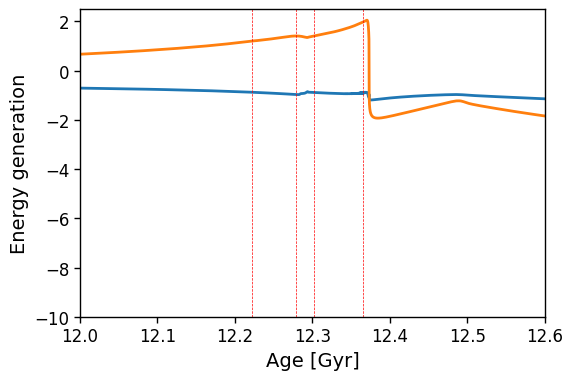

In [47]:
plt.ylim([-10, 2.5])

plt.plot(h2s.data("age")/1e9, h2s.data("pp"))
plt.plot(h2s.data("age")/1e9, h2s.data("cno"))

plt.axvline(h2.data('age')[first_rlof_case2_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[first_rlof_case2_mask][-1]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[second_rlof_case2_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h2.data('age')[second_rlof_case2_mask][-1]/1e9, ls='--', lw=0.5, c='r')

plt.xlim([12, 12.6])
plt.xlabel("Age [Gyr]")
plt.ylabel("Energy generation")

plt.show()

# plt.plot(h2s.data("age")/1e9, h2s.data("tri_alfa"))

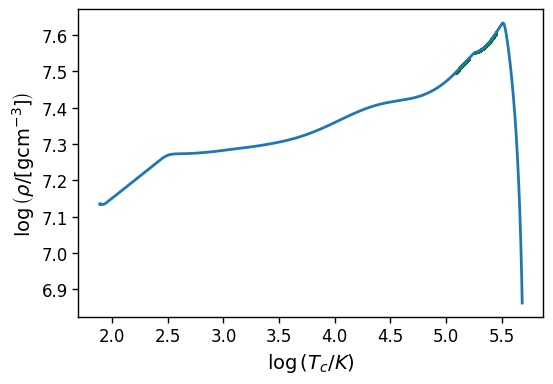

In [48]:
plt.plot(h2s.data("log_cntr_Rho"), h2s.data("log_cntr_T"))
plt.scatter(
    h2s.data("log_cntr_Rho")[first_rlof_case2_mask],
    h2s.data("log_cntr_T")[first_rlof_case2_mask],
    c="g",
    s=1,
)
plt.scatter(
    h2s.data("log_cntr_Rho")[second_rlof_case2_mask],
    h2s.data("log_cntr_T")[second_rlof_case2_mask],
    c="g",
    s=1,
)

plt.xlabel(r"$\log\left(T_c/K\right)$")
plt.ylabel(r"$\log\left(\rho/[\mathrm{g cm^{-3}}]\right)$")

plt.show()

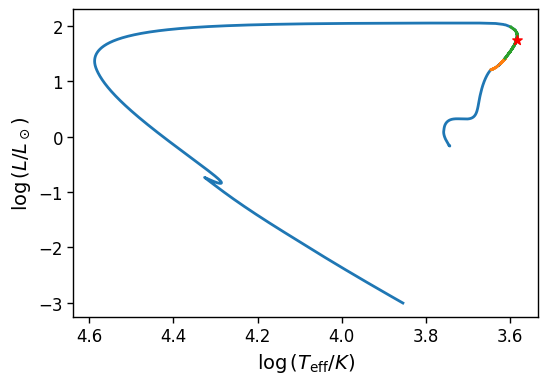

In [49]:
plt.plot(h2s.data("log_Teff"), h2s.data("log_L"))
plt.plot(h2s.data("log_Teff")[first_rlof_case2_mask], h2s.data("log_L")[first_rlof_case2_mask])
plt.plot(h2s.data("log_Teff")[second_rlof_case2_mask], h2s.data("log_L")[second_rlof_case2_mask])

plt.scatter(h2s.data("log_Teff")[transition_idx_case2], h2s.data("log_L")[transition_idx_case2], 
            marker='*', s=50, c='r', zorder=10)

plt.gca().invert_xaxis()

plt.xlabel(r"$\log\left(T_\mathrm{eff}/K\right)$")
plt.ylabel(r"$\log\left(L/L_\odot\right)$")

plt.show()

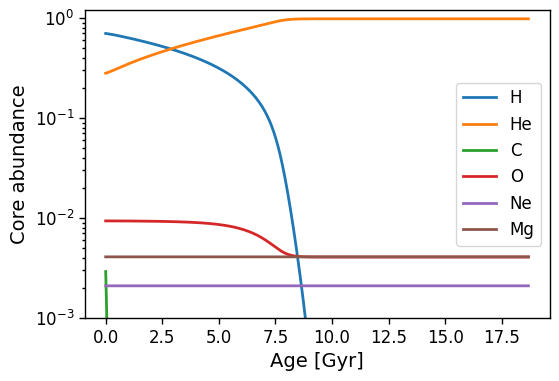

In [50]:
plt.plot(h2s.data("age")/1e9, h2s.data("center_h1"), label='H')
plt.plot(h2s.data("age")/1e9, h2s.data("center_he4"), label='He')
plt.plot(h2s.data("age")/1e9, h2s.data("center_c12"), label='C')
plt.plot(h2s.data("age")/1e9, h2s.data("center_o16"), label='O')
plt.plot(h2s.data("age")/1e9, h2s.data("center_ne20"), label='Ne')
plt.plot(h2s.data("age")/1e9, h2s.data("center_mg24"), label='Mg')

plt.yscale("log")
plt.ylim([1e-3,1.2])

plt.legend()

plt.xlabel("Age [Gyr]")
plt.ylabel("Core abundance")

plt.show()

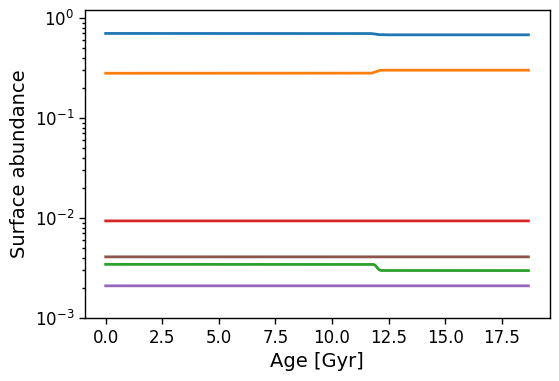

In [51]:
plt.plot(h2s.data("age")/1e9, h2s.data("surface_h1"))
plt.plot(h2s.data("age")/1e9, h2s.data("surface_he4"))
plt.plot(h2s.data("age")/1e9, h2s.data("surface_c12"))
plt.plot(h2s.data("age")/1e9, h2s.data("surface_o16"))
plt.plot(h2s.data("age")/1e9, h2s.data("surface_ne20"))
plt.plot(h2s.data("age")/1e9, h2s.data("surface_mg24"))

plt.yscale("log")
plt.ylim([1e-3,1.2])

plt.xlabel("Age [Gyr]")
plt.ylabel("Surface abundance")

plt.show()

In [52]:
print("Final total mass: {:.3f} Msun".format(h2s.data("star_mass")[-1]))
print("Final envelope mass: {:.3f} Msun".format(h2s.data("envelope_mass")[-1]))

Final total mass: 0.298 Msun
Final envelope mass: 0.002 Msun


In [53]:
idx = list(model_m2["ns_fspin"].values).index(max(model_m2["ns_fspin"].values))

In [54]:
model_m2["ns_fspin"][transition_idx_case2]

630.3176175206318

In [55]:
1/model_m2["ns_fspin"][transition_idx_case2] *(10**3)

1.5865017448402

In [56]:
model_m2["ns_ang_mom"][transition_idx_case2]

0.3183381572056898

In [57]:
mass_loss_rates = 10**lg_m2dot
ages = model_m2["age"].values 

# Calculate the intervals (differences between consecutive ages)
time_intervals = np.diff(ages)

# Calculate the weighted mass loss for each interval
weighted_mass_loss = mass_loss_rates[:-1] * time_intervals

# Calculate the time-averaged mass loss rate
time_averaged_mass_loss_rate = np.sum(weighted_mass_loss) / (ages[-1] - ages[0])

print("Time-averaged mass loss rate:", time_averaged_mass_loss_rate)

Time-averaged mass loss rate: 3.705227857956344e-11


## Case M3: phase transition after accretion

In [58]:
h3 = mr.MesaData("data/md1.0_mc1.2_p22.627_z0.02_b0.5/binary_history.data")
h3s = mr.MesaData("data/md1.0_mc1.2_p22.627_z0.02_b0.5/history.data")

In [59]:
lg_m3dot = h3.data("lg_mtransfer_rate")
lg_m3dot[lg_m3dot > 0] = lg_m3dot[0] #exclude some weird values

# Masks to filter the RLOF phases
rlof_case3_mask = np.where((lg_m3dot > -8))

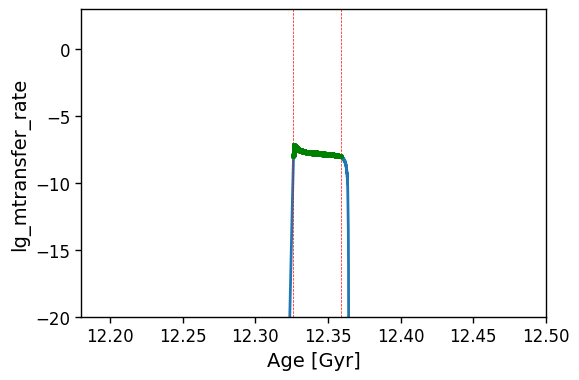

In [60]:
plt.xlabel("Age [Gyr]")
plt.ylabel("lg_mtransfer_rate")

plt.plot(h3.data('age')/1e9, lg_m3dot)
plt.scatter(h3.data("age")[rlof_case3_mask]/1e9, lg_m3dot[rlof_case3_mask], s=5, c='g', zorder=20)

plt.axvline(h3.data("age")[rlof_case3_mask[0][0]]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h3.data("age")[rlof_case3_mask[0][-1]]/1e9, ls='--', lw=0.5, c='r')

plt.xlim([12.18, 12.5])
plt.ylim([-20, 3])

plt.show()

In [61]:
print(
    "Age of donor star when RLOF is initiated: {:.2f} Gyr"
    .format(h3.data('age')[rlof_case3_mask[0][0]]/1e9)
)

Age of donor star when RLOF is initiated: 12.33 Gyr


In [62]:
print(
    "Age of donor star when it reaches its maximum mass transfer rate: {:.2f} Gyr"
    .format(h3.data('age')[np.where(lg_m3dot == max(lg_m3dot))][0]/1e9)
)

Age of donor star when it reaches its maximum mass transfer rate: 12.33 Gyr


In [63]:
# How much later is RLOF initiated for model M3 compared to models M1 and M2

# print(
#     "{:.2f} Myr later"
#     .format(
#         (
#          (h3.data('age')[np.where(lg_m3dot == max(lg_m3dot))][0]) - \
#          (h1.data('age')[np.where(lg_m1dot == max(lg_m1dot))][0])
#         )/1e6
#     )
# )

print(
    "{:.2f} Myr later"
    .format(
        (
         (h3.data('age')[rlof_case3_mask[0][0]]) - \
         (h2.data('age')[first_rlof_case2_mask[0][0]])
        )/1e6
    )
)

104.07 Myr later


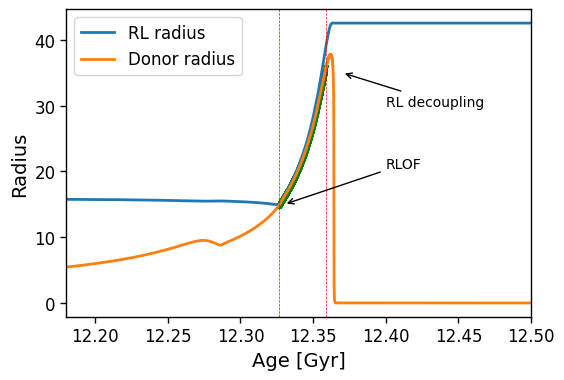

In [64]:
plt.xlabel("Age [Gyr]")
plt.ylabel("Radius")

plt.plot(h3.data('age')/1e9, h3.data('rl_1'), label="RL radius")
plt.plot(h3.data('age')/1e9, h3.data('star_1_radius'), label="Donor radius")
plt.scatter(h3.data('age')[rlof_case3_mask]/1e9, h3.data('star_1_radius')[rlof_case3_mask], c='g', s=5)

plt.axvline(h3.data("age")[rlof_case3_mask[0][0]]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h3.data("age")[rlof_case3_mask[0][-1]]/1e9, ls='--', lw=0.5, c='r')

plt.annotate("RLOF", xy=(12.33, 15.0), xytext=(12.40, 20.5), arrowprops=dict(arrowstyle="->"))
plt.annotate("RL decoupling", xy=(12.37, 35), xytext=(12.40, 30.0), arrowprops=dict(arrowstyle="->"))

plt.xlim([12.18, 12.5])

plt.legend(loc='upper left')
plt.show()

In [65]:
# Indeces for the various mass transfer episodes

# rlof_start_idx = np.where(lg_m3dot == max(lg_m3dot))[0][0]
# rlof_end_idx = np.where(np.isclose(h3.data('age')/1e9, 12.364, 0.00001))[0][0]

rlof_start_idx = rlof_case3_mask[0][0]
rlof_end_idx = rlof_case3_mask[0][-1]

In [66]:
print(
    "Duration of RLOF: {:.2f} Myr"
    .format(
        (h3.data('age')[rlof_end_idx] - \
         h3.data('age')[rlof_start_idx]
        )/1e6
    )
)

Duration of RLOF: 32.79 Myr


In [67]:
percentage_occupied = h3.data("star_1_radius")[rlof_end_idx] / h3.data("rl_1")[rlof_end_idx] * 100
print(f"The radius of the star occupies approximately {percentage_occupied:.1f}% of the Roche lobe when it decouples.")

The radius of the star occupies approximately 91.7% of the Roche lobe when it decouples.


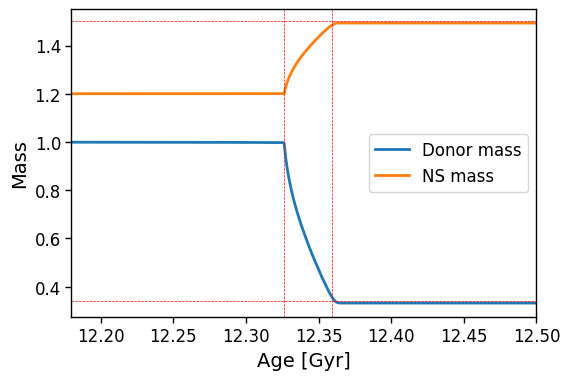

In [68]:
plt.xlabel("Age [Gyr]")
plt.ylabel("Mass")

plt.plot(h3.data('age')/1e9, h3.data('star_1_mass'), label="Donor mass")
plt.plot(h3.data('age')/1e9, h3.data('star_2_mass'), label="NS mass")

plt.axvline(h3.data("age")[rlof_case3_mask[0][0]]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h3.data("age")[rlof_case3_mask[0][-1]]/1e9, ls='--', lw=0.5, c='r')


plt.axhline(1.5, ls='--', lw=0.5, c='r')
plt.axhline(0.34, ls='--', lw=0.5, c='r')

plt.xlim([12.18, 12.5])

plt.legend()
plt.show()

In [69]:
print("Mass of donor star at the end: {:.2f} Msun".format(min(h3.data("star_1_mass"))))

print("Mass of neutron star at the end: {:.2f} Msun".format(max(h3.data("star_2_mass"))))

Mass of donor star at the end: 0.33 Msun
Mass of neutron star at the end: 1.49 Msun


In [70]:
# Find phase transition index
transition_idx_case3 = get_trans_idx(model_m3["ns_mass"], model_m3["ns_radius"], eps=1e-2)
print(transition_idx_case3)
print(
    "M@PT = {:.2f} Msun; R@PT = {:.2f} km".format(
        model_m3["ns_mass"][transition_idx_case3],
        model_m3["ns_radius"][transition_idx_case3],
    )
)

# transition_idx_case3 = 0

# for m, r in zip(model_m3["ns_mass"], model_m3["ns_radius"]):
#     if math.isclose(m, 1.493, rel_tol=0.0004) and math.isclose(r, 14.61, rel_tol=0.003):
#         print(transition_idx_case3)
#         print(m, r)
#         break
#     else:
#         transition_idx_case3 += 1

25586
M@PT = 1.56 Msun; R@PT = 15.19 km


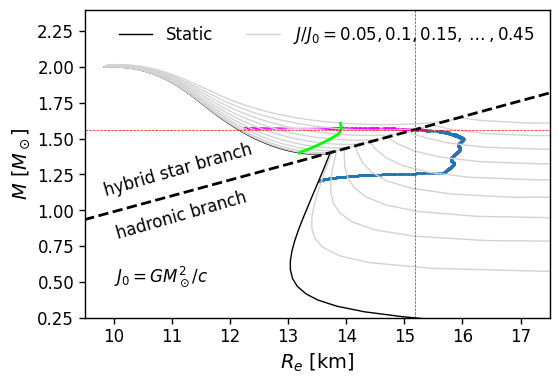

In [71]:
Js = ['0.0','0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45']
s=12

for J in Js:
    radius = radius_tab[angular_momentum_tab==np.float64(J)]
    mass = mass_tab[angular_momentum_tab==np.float64(J)]

    if J == "0.0":
        plt.plot(radius, mass,ls='-', color="k", lw=1, label="Static")
    else:
        if J == "0.45" :
            label = r"$J/J_0 = 0.05, 0.1, 0.15, \dots, 0.45$"
        else:
            label = None
        plt.plot(radius, mass, ls='-', color="lightgrey", lw=1, label=label)
               

# Corresponding baryonic mass
R_bar = [13.193, 13.213, 13.265, 13.346, 13.466, 13.586, 13.720, 13.863, 13.920, 13.901]
M_bar = [1.3992, 1.4054, 1.4136, 1.4259, 1.4463, 1.4689, 1.4975, 1.5303, 1.5693, 1.6082]
plt.plot(R_bar, M_bar, c='lime')
            
            

# RLOF
plt.scatter(
    model_m3["ns_radius"][rlof_start_idx:rlof_end_idx], 
    model_m3["ns_mass"][rlof_start_idx:rlof_end_idx], 
    s=0.01
)

# Propeller phase
plt.scatter(
    model_m3["ns_radius"][rlof_end_idx:], 
    model_m3["ns_mass"][rlof_end_idx:], 
    s=0.01, 
    c='magenta'
)

plt.xlabel(r"$R_e$ [km]")
plt.ylabel(r"$M$ [$M_\odot$]")
plt.ylim([0.25, 2.4])
plt.xlim([9.5, 17.5])


s = 12
plt.text(10, 0.5, r"$J_0 = G M_\odot^2 / c$", size=s)


# y = lambda x : 0.111*x - 0.134
# plt.plot(np.linspace(5, 20, 1000), y(np.linspace(5, 20, 1000)), ls='--', c='k')

# Transition line
plt.plot(ns_radius_trans(np.linspace(0, 2, 100)), np.linspace(0, 2, 100), ls='--', c='k')

plt.text(10, 0.8, "hadronic branch", rotation=16, size=s)
plt.text(9.8, 1.1, "hybrid star branch", rotation=16, size=s)

plt.legend(loc="upper right", ncol=2, frameon=False, prop={"size":s})

# Transition
plt.axvline(model_m3["ns_radius"][transition_idx_case3], ls='--', lw=0.5, c='r')
plt.axhline(model_m3["ns_mass"][transition_idx_case3], ls='--', lw=0.5, c='r')

plt.show()

In [72]:
print(
    "Duration of spin down until phase transition: {:.2f} Kyr"
    .format(
        (h3.data("age")[transition_idx_case3] - \
         h3.data("age")[rlof_end_idx]
        )/1e3
    )
)

Duration of spin down until phase transition: -360.50 Kyr


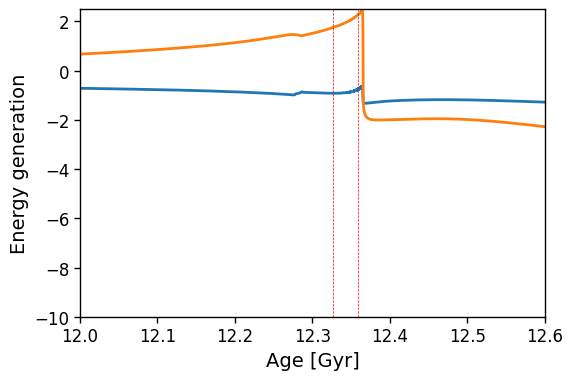

In [73]:
plt.ylim([-10, 2.5])

plt.plot(h3s.data("age")/1e9, h3s.data("pp"))
plt.plot(h3s.data("age")/1e9, h3s.data("cno"))

plt.axvline(h3.data('age')[rlof_case3_mask][0]/1e9, ls='--', lw=0.5, c='r')
plt.axvline(h3.data('age')[rlof_case3_mask][-1]/1e9, ls='--', lw=0.5, c='r')


plt.xlim([12, 12.6])
plt.xlabel("Age [Gyr]")
plt.ylabel("Energy generation")

plt.show()

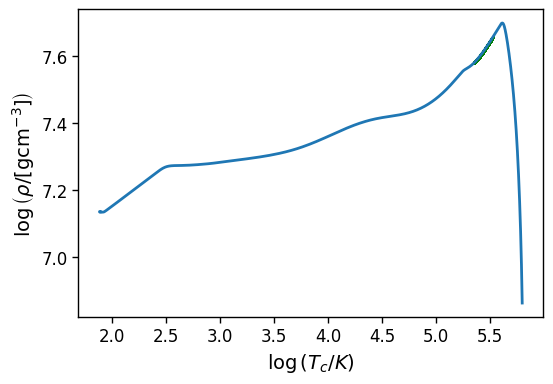

In [74]:
plt.plot(h3s.data("log_cntr_Rho"), h3s.data("log_cntr_T"))
plt.scatter(
    h3s.data("log_cntr_Rho")[rlof_case3_mask],
    h3s.data("log_cntr_T")[rlof_case3_mask],
    c="g",
    s=1,
)

plt.xlabel(r"$\log\left(T_c/K\right)$")
plt.ylabel(r"$\log\left(\rho/[\mathrm{g cm^{-3}}]\right)$")

plt.show()

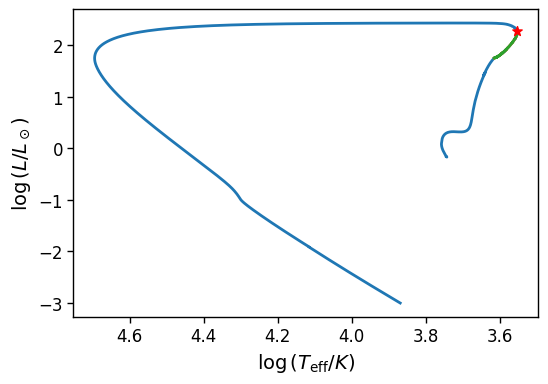

In [75]:
plt.plot(h3s.data("log_Teff"), h3s.data("log_L"))
plt.plot(h3s.data("log_Teff")[rlof_case3_mask], h3s.data("log_L")[rlof_case3_mask])
plt.plot(h3s.data("log_Teff")[rlof_case3_mask], h3s.data("log_L")[rlof_case3_mask])

plt.scatter(h3s.data("log_Teff")[transition_idx_case3], h3s.data("log_L")[transition_idx_case3], 
            marker='*', s=50, c='r', zorder=10)

plt.gca().invert_xaxis()

plt.xlabel(r"$\log\left(T_\mathrm{eff}/K\right)$")
plt.ylabel(r"$\log\left(L/L_\odot\right)$")

plt.show()

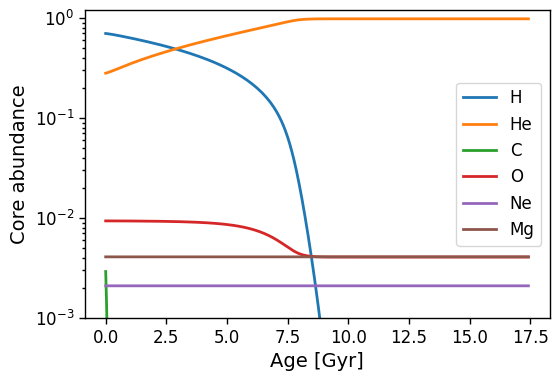

In [76]:
plt.plot(h3s.data("age")/1e9, h3s.data("center_h1"), label='H')
plt.plot(h3s.data("age")/1e9, h3s.data("center_he4"), label='He')
plt.plot(h3s.data("age")/1e9, h3s.data("center_c12"), label='C')
plt.plot(h3s.data("age")/1e9, h3s.data("center_o16"), label='O')
plt.plot(h3s.data("age")/1e9, h3s.data("center_ne20"), label='Ne')
plt.plot(h3s.data("age")/1e9, h3s.data("center_mg24"), label='Mg')

plt.yscale("log")
plt.ylim([1e-3,1.2])

plt.legend()

plt.xlabel("Age [Gyr]")
plt.ylabel("Core abundance")

plt.show()

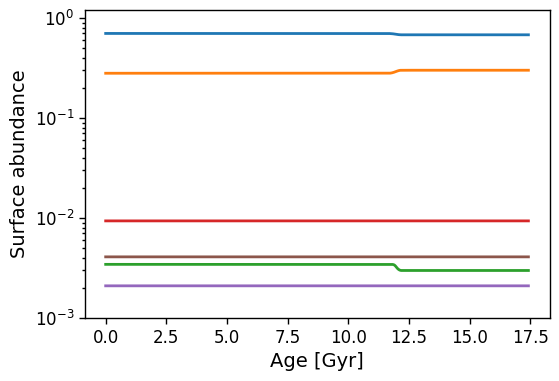

In [77]:
plt.plot(h3s.data("age")/1e9, h3s.data("surface_h1"))
plt.plot(h3s.data("age")/1e9, h3s.data("surface_he4"))
plt.plot(h3s.data("age")/1e9, h3s.data("surface_c12"))
plt.plot(h3s.data("age")/1e9, h3s.data("surface_o16"))
plt.plot(h3s.data("age")/1e9, h3s.data("surface_ne20"))
plt.plot(h3s.data("age")/1e9, h3s.data("surface_mg24"))

plt.yscale("log")
plt.ylim([1e-3,1.2])

plt.xlabel("Age [Gyr]")
plt.ylabel("Surface abundance")

plt.show()

In [78]:
print("Final total mass: {:.3f} Msun".format(h3s.data("star_mass")[-1]))
print("Final envelope mass: {:.3f} Msun".format(h3s.data("envelope_mass")[-1]))

Final total mass: 0.332 Msun
Final envelope mass: 0.002 Msun


In [79]:
print(
    """
    Neutron star gravitational mass at transition:
       - model m2: {:.3f} Msun
       - model m3: {:.3f} Msun
    
    Neutron star equatorial radius at transition:
       - model m2: {:.3f} km
       - model m3: {:.3f} km
       
    Neutron star angular momentum at transition:
       - model m2: {:.3f} Msun^2/cG
       - model m3: {:.3f} Msun^2/cG
    """
    .format(
        model_m2["ns_mass"][transition_idx_case2], model_m3["ns_mass"][transition_idx_case3],
        model_m2["ns_radius"][transition_idx_case2], model_m3["ns_radius"][transition_idx_case3],
        model_m2["ns_ang_mom"][transition_idx_case2], model_m3["ns_ang_mom"][transition_idx_case3]
    )
)


    Neutron star gravitational mass at transition:
       - model m2: 1.498 Msun
       - model m3: 1.563 Msun
    
    Neutron star equatorial radius at transition:
       - model m2: 14.590 km
       - model m3: 15.191 km
       
    Neutron star angular momentum at transition:
       - model m2: 0.318 Msun^2/cG
       - model m3: 0.412 Msun^2/cG
    


In [80]:
model_m3["ns_fspin"][rlof_end_idx]

852.9589425940212

In [81]:
(1/model_m3["ns_fspin"][rlof_end_idx]) * 1e3

1.1723893731142523

In [82]:
model_m3["ns_fspin"][transition_idx_case3]

834.6963070658094

In [83]:
(1/model_m3["ns_fspin"][transition_idx_case3]) * 1e3

1.198040522684567

In [84]:
plt.style.use(["default", "notebook"])

(1.5, 2.0)

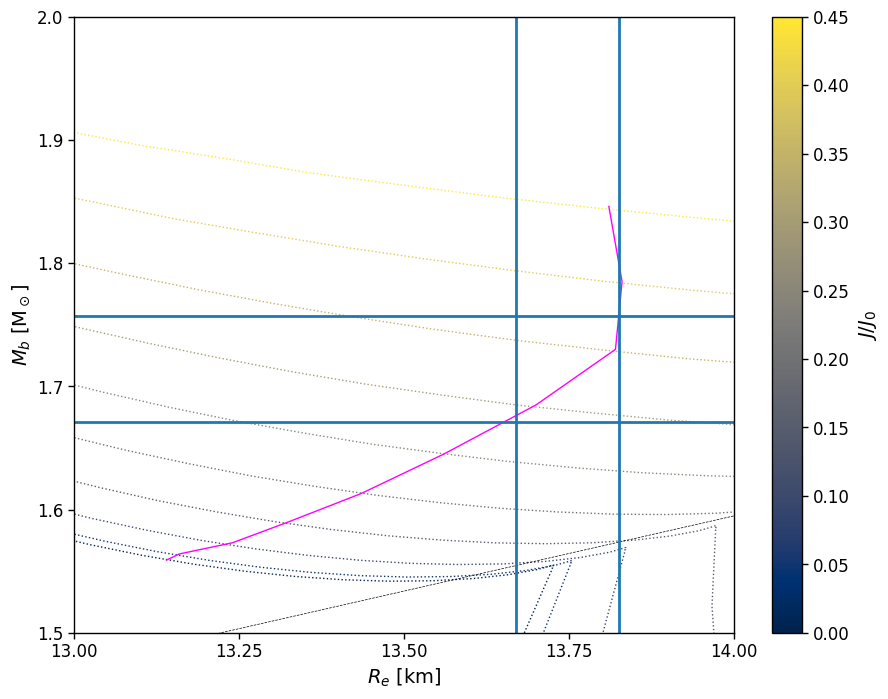

In [85]:
# Set up the colormap
norm = mcolors.Normalize(vmin=0.0, vmax=0.45)
cmap = cm.cividis

m2_color = "forestgreen"
m3_color = "navy"

fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

custom_lines = [
    Line2D([0], [0], color="crimson", lw=0.5),
    Line2D([0], [0], color="forestgreen", lw=0.5),
    Line2D([0], [0], color="navy", lw=0.5),
    Line2D([0], [0], marker="*", markeredgecolor='k', markerfacecolor='white', lw=0),
    Line2D([0], [0], marker="^", markeredgecolor="grey", markerfacecolor='white', lw=0),
]

sm2 = cm.ScalarMappable(cmap=cmap, norm=norm)
sm2.set_array([])

for J in Js:
    radius = radius_tab[angular_momentum_tab == np.float64(J)]
    mass = mass_bar_tab[angular_momentum_tab == np.float64(J)]
    color = cmap(norm(np.float64(J)))
    ax1.plot(radius, mass, ls="dotted", color=color, lw=1)


R_bar1 = [13.14, 13.16, 13.24, 13.325, 13.435, 13.56, 13.7, 13.82, 13.83, 13.81]
M_bar1 = [1.559, 1.564, 1.573, 1.59, 1.613, 1.645, 1.685, 1.73, 1.785, 1.846]

ax1.plot(R_bar1, M_bar1, c="magenta", lw=1)

r_arr = []
for m in M_bar1:
    r_arr.append(ns_radius_trans(m).value * 0.905)


ax1.plot(
    ns_radius_trans(np.linspace(0, 2, 100)) * 0.905,
    np.linspace(0, 2, 100),
    ls="--",
    c="k",
    lw=0.5,
)


ax1.plot(
    model_m1["ns_radius"],
    model_m1["ns_mass_bar"],
    color="crimson",
    lw=0.5,
    label="Model M1",
)
ax1.plot(
    model_m2["ns_radius"][:transition_idx_case2],
    model_m2["ns_mass_bar"][:transition_idx_case2],
    color=m2_color,
    lw=0.5,
    label="Model M2",
)
ax1.plot(
    model_m3["ns_radius"][:transition_idx_case3],
    model_m3["ns_mass_bar"][:transition_idx_case3],
    color=m3_color,
    lw=0.5,
    label="Model M3",
)




ax1.set_xlabel(r"$R_e$ [km]")
ax1.set_ylabel(r"$M_b$ [M$_\odot$]")
ax1.xaxis.set_major_locator(MaxNLocator(nbins=4))  # Set maximum number of x-axis ticks
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Set maximum number of y-axis ticks
ax1.set_ylim([0.25, 2.7])
ax1.set_xlim([9.5, 17.0])



# Add the colorbar for the first plot
cbar1 = fig.colorbar(sm2, ax=ax1, orientation="vertical", fraction=0.25, pad=0.04)
cbar1.set_label("$J/J_0$", rotation=90, labelpad=5)

ax1.axhline(model_m2["ns_mass_bar"][transition_idx_case2])
ax1.axvline(13.67)

ax1.axhline(model_m3["ns_mass_bar"][transition_idx_case3])
ax1.axvline(13.825)


ax1.set_xlim([13, 14.])
ax1.set_ylim([1.5, 2.0])

In [86]:
r2_hybrid = 13.67
r3_hybrid = 13.825

In [87]:
# Js = ['0.0','0.05','0.1','0.15','0.2','0.25','0.3', '0.35','0.4', '0.45']
# s=12

# for J in Js:
#     radius = radius_tab[angular_momentum_tab==np.float64(J)]
#     mass = mass_tab[angular_momentum_tab==np.float64(J)]

#     if J == "0.0":
#         plt.plot(radius, mass,ls='-', color="k", lw=1, label="Static")
#     elif J == "0.32" or J == "0.41":
#         plt.plot(radius, mass, ls='-', color="blue", lw=1)
#     else:
#         if J == "0.45" :
#             label = r"$J/J_0 = 0.05, 0.1, 0.15, \dots, 0.45$"
#         else:
#             label = None
#         plt.plot(radius, mass, ls='-', color="lightgrey", lw=1, label=label)
               

# # Corresponding baryonic mass
# R_bar = [13.193, 13.213, 13.265, 13.346, 13.466, 13.586, 13.720, 13.863, 13.920, 13.901]
# M_bar = [1.3992, 1.4054, 1.4136, 1.4259, 1.4463, 1.4689, 1.4975, 1.5303, 1.5693, 1.6082]
# plt.plot(R_bar, M_bar, c='lime')
            
            
# plt.scatter(
#     model_m1["ns_radius"], 
#     model_m1["ns_mass"], 
#     s=0.001
# )
        
# plt.scatter(
#     model_m2["ns_radius"][:transition_idx_case2], 
#     model_m2["ns_mass"][:transition_idx_case2], 
#     s=0.001
# )
        
# plt.scatter(
#     model_m3["ns_radius"][:transition_idx_case3], 
#     model_m3["ns_mass"][:transition_idx_case3], 
#     s=0.001
# )


# plt.xlabel(r"$R_e$ [km]")
# plt.ylabel(r"$M$ [$M_\odot$]")



# s = 12

# # Transition line
# plt.plot(ns_radius_trans(np.linspace(0, 2, 100)), np.linspace(0, 2, 100), ls='--', c='k')

# # plt.scatter(14.61, 1.5, s=100, c='red', marker='^', zorder=100)

# plt.ylim([1.35, 1.6])
# plt.xlim([12.5, 16])
# # plt.legend(loc="upper right", ncol=2, frameon=False, prop={"size":s})




# # plt.axhline(1.5-0.001,ls=':', c='r')
# plt.axhline(1.5-0.01,ls=':', c='r')
# plt.axvline(13.68, ls=':', c='r')

# # plt.axhline(1.56-0.001,ls=':', c='b')
# plt.axhline(1.56-0.01,ls=':', c='b')
# plt.axvline(13.89, ls=':', c='b')
 
# plt.scatter(13.68, 1.5-0.01, s=100, marker="*", zorder=100, c='r')
# plt.scatter(13.89, 1.56-0.01, s=100, marker="*", zorder=100, c='b')

In [88]:
plt.style.use(["default", "science", "notebook"])

In [89]:
model_m2["ns_ang_mom"][transition_idx_case2]

0.3183381572056898

In [90]:
print(
    "M2@PT: M={:.2f} Msun; R={:.2f} km"
    .format(
        model_m2["ns_mass"][transition_idx_case2], 
        model_m2["ns_radius"][transition_idx_case2]
    )
)

print(
    "M3@PT: M={:.2f} Msun; R={:.2f} km"
    .format(
        model_m3["ns_mass"][transition_idx_case3], 
        model_m3["ns_radius"][transition_idx_case3]
    )
)

M2@PT: M=1.50 Msun; R=14.59 km
M3@PT: M=1.56 Msun; R=15.19 km


In [91]:
print(
    "M2 after PT: M={:.2f} Msun; R={:.2f} km"
    .format(
        model_m2["ns_mass"][transition_idx_case2]-0.01, 
        r2_hybrid
    )
)

print(
    "M3 after PT: M={:.2f} Msun; R={:.2f} km"
    .format(
        model_m3["ns_mass"][transition_idx_case3]-0.01, 
        r3_hybrid
    )
)

M2 after PT: M=1.49 Msun; R=13.67 km
M3 after PT: M=1.55 Msun; R=13.82 km


In [92]:
xi_case2 = (model_m2["ns_radius"][transition_idx_case2] - r2_hybrid) / model_m2[
    "ns_radius"
][transition_idx_case2]

xi_case3 = (model_m3["ns_radius"][transition_idx_case3] - r3_hybrid) / model_m3[
    "ns_radius"
][transition_idx_case3]

print(f"xi2 = {xi_case2*100:.1f}%, xi3 = {xi_case3*100:.1f}%")

xi2 = 6.3%, xi3 = 9.0%


In [93]:
model_m2["orbital_period"][transition_idx_case2]

45.61095976809921

In [94]:
(model_m2["don_mass"][rlof_2_end_idx] - model_m2["don_mass"][transition_idx_case2])

-0.06198724989422599

In [95]:
round(h2s.data("envelope_mass")[transition_idx_case2],2)

0.1

## Calculate circularization / synchronization timescale for posttransition evolution of model M2

In [96]:
q2 = (1.5-0.01)/h2s.data("star_mass")[transition_idx_case2]
M = h2s.data("star_mass")[transition_idx_case2] * u.Msun
R = 10**h2s.data("log_R")[transition_idx_case2] * u.Rsun
L = 10**h2s.data("log_L")[transition_idx_case2] * u.Lsun
tf = (M*(R*R)/L)**(1/3)
a = h2s.data("binary_separation")[transition_idx_case2] * u.Rsun
I = (h2s.data("i_rot_total")[transition_idx_case2] * (u.g * u.cm * u.cm)).to(u.Msun * u.Rsun * u.Rsun)

In [97]:
v_rot = h2s.data("surf_avg_v_rot")[transition_idx_case2] * (u.km / u.s)
g = (10**h2s.data("log_g")[transition_idx_case2]) * (u.cm / (u.s * u.s))
l = ((2*v_rot*v_rot)/(3*g*R)).decompose()
10**(-1.84 - l.value)

0.012657553770909451

In [98]:
l

<Quantity 0.05765022>

In [99]:
k2 = 0.01
tcirc = (tf/(84*q2*(1+q2)*k2)) * ((a/R)**8)
tcirc.to(u.yr)

<Quantity 1635.58103524 yr>

In [100]:
tsync = (tf/(6*q2*q2*k2)) * (I/(M*R*R)) * ((a/R)**6)
tsync.to(u.yr)

<Quantity 45.5181127 yr>